In [167]:
import numpy as np
import pandas as pd

df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [168]:
df.corr(numeric_only=True)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df[['Length1']]
y = df['Weight']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)
pre = model.predict(x_test)
print('r2 score :',r2_score(y_test,pre))
print('mse :',mean_squared_error(y_test,pre))

r2 score : 0.8116084146869396
mse : 26796.684740821387


In [170]:
pre = model.predict(np.array([30]).reshape(-1,1))
print("Prediction : ",pre[0])

Prediction :  509.1585834788583


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [171]:
X = df[['Length3']]
y = df['Weight']

random_states = range(0, 43)
r2_scores = []
mse_values = []

print('-' * 59)
print(f"| {'Random State':^13} | {'R2 Score':^12} | {'Mean Squared Error':^24} |")
for state in random_states:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=state)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2_scores.append(r2)
  mse_values.append(mse)
  print('-' * 59)
  print(f"| {state:^13.0f} | {r2:^12.6f} | {mse:^24.6f} |")
print('-' * 59)

-----------------------------------------------------------
| Random State  |   R2 Score   |    Mean Squared Error    |
-----------------------------------------------------------
|       0       |   0.864594   |       25774.568187       |
-----------------------------------------------------------
|       1       |   0.897627   |       13829.755740       |
-----------------------------------------------------------
|       2       |   0.747892   |       28864.334193       |
-----------------------------------------------------------
|       3       |   0.829047   |       15695.791681       |
-----------------------------------------------------------
|       4       |   0.829606   |       18686.067205       |
-----------------------------------------------------------
|       5       |   0.897781   |       13959.630363       |
-----------------------------------------------------------
|       6       |   0.836991   |       24145.437194       |
----------------------------------------

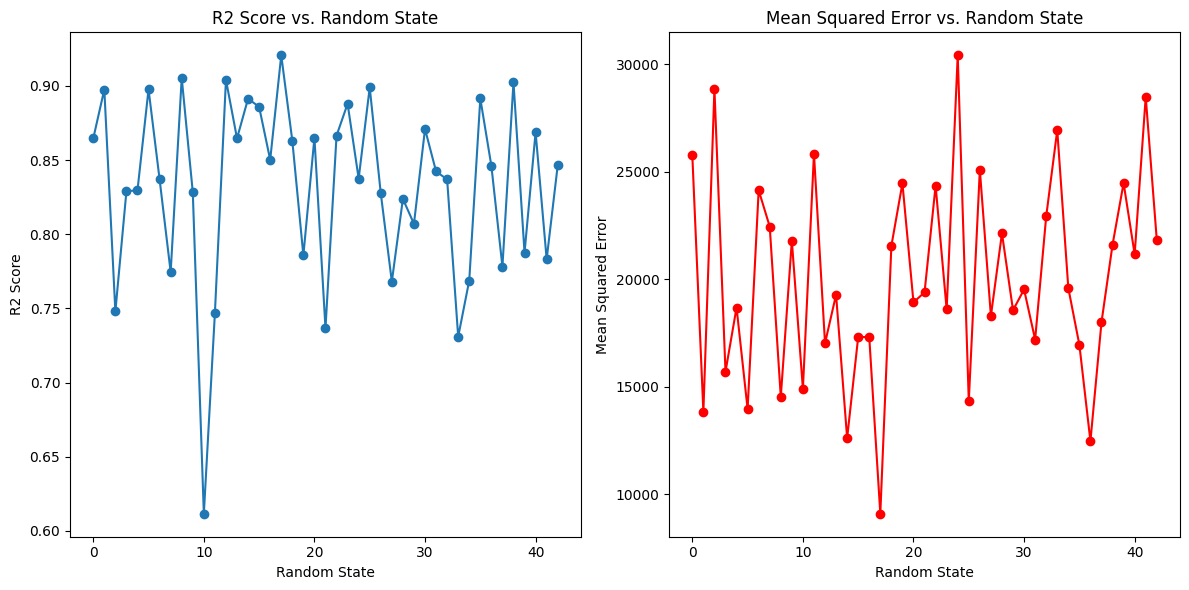

minimum mse value of 9085.16422249463 was obtained for random state 17
maximum r2_score value of 0.9207298326952611 was obtained for random state 17


In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(random_states, r2_scores, marker='o')
plt.title('R2 Score vs. Random State')
plt.xlabel('Random State')
plt.ylabel('R2 Score')
plt.subplot(1, 2, 2)
plt.plot(random_states, mse_values, marker='o', color='r')
plt.title('Mean Squared Error vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()
print(f"minimum mse value of {min(mse_values)} was obtained for random state {mse_values.index(min(mse_values))}")
print(f"maximum r2_score value of {max(r2_scores)} was obtained for random state {r2_scores.index(max(r2_scores))}")

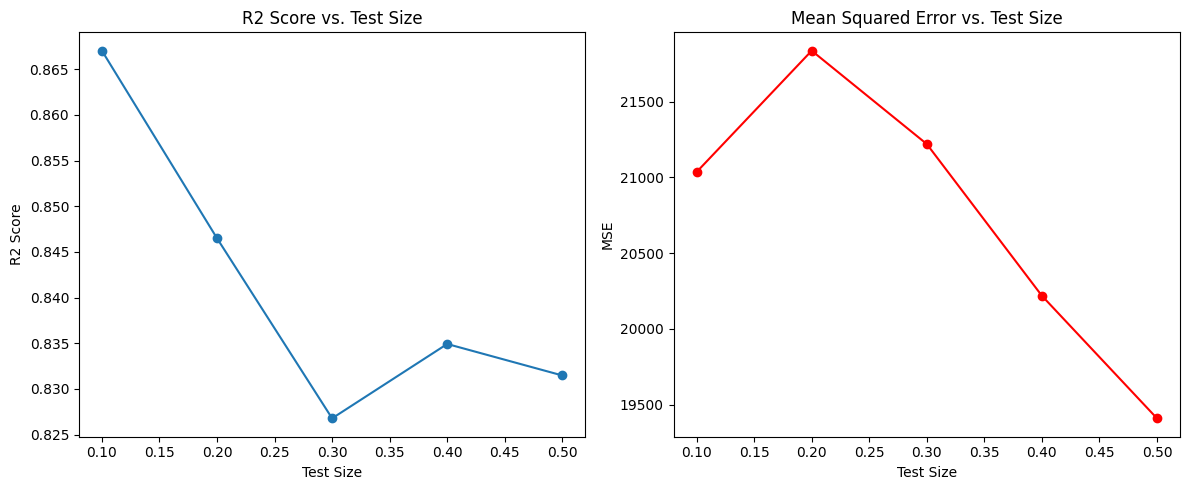


Minimum MSE of 19410.36 was obtained at test size 0.5
Maximum R2 score of 0.8670 was obtained at test size 0.1


In [173]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
r2_scores = []
mse_values = []
for size in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size,random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2_scores.append(r2)
  mse_values.append(mse)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(test_sizes, r2_scores, marker='o')
plt.title('R2 Score vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('R2 Score')
plt.subplot(1, 2, 2)
plt.plot(test_sizes, mse_values, marker='o', color='r')
plt.title('Mean Squared Error vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()

min_mse_index = mse_values.index(min(mse_values))
max_r2_index = r2_scores.index(max(r2_scores))
print(f"\nMinimum MSE of {mse_values[min_mse_index]:.2f} was obtained at test size {test_sizes[min_mse_index]}")
print(f"Maximum R2 score of {r2_scores[max_r2_index]:.4f} was obtained at test size {test_sizes[max_r2_index]}")

In [174]:
# MultiLinear Regression

In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [176]:
x = df[["Length1", "Length2", "Length3", "Height"]]
y = df['Width']

x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [177]:
pre = model.predict(x_test)
print('r2 score :',r2_score(y_test,pre))
print('mse :',mean_squared_error(y_test,pre))

r2 score : 0.9513143498200114
mse : 0.17083217471977818


In [178]:
pre=model.predict(np.array([[20,20,30,12],[20,20,30,12]]))
print('Prediction: ',pre)

Prediction:  [0.97293023 0.97293023]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


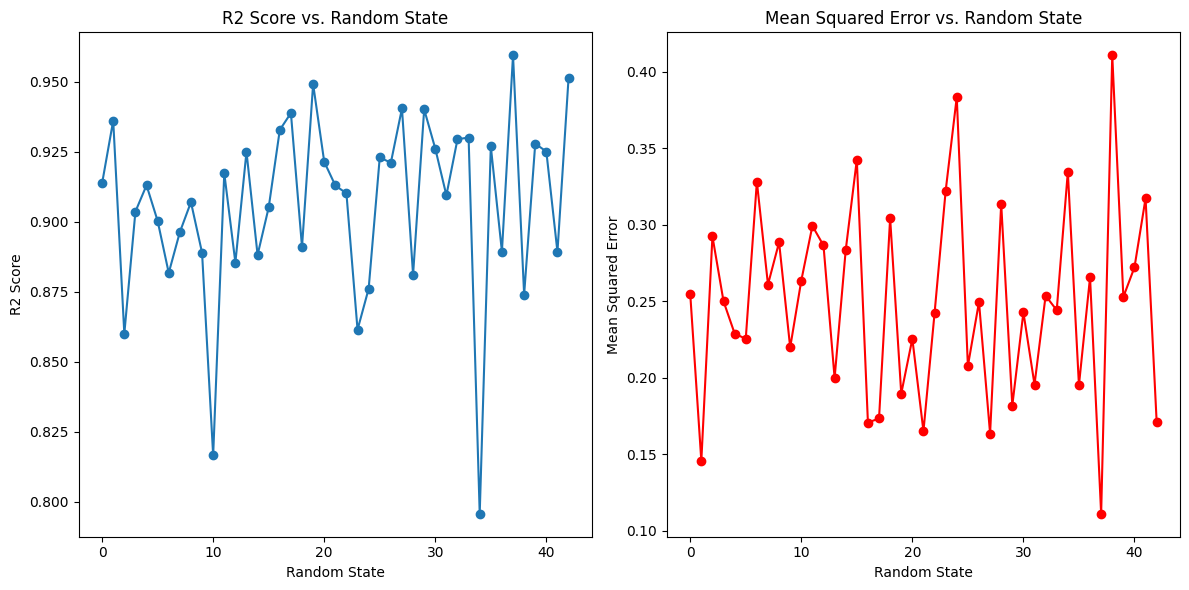

minimum mse value of 0.11105937222304382 was obtained for random state37
maximum r2_score value of 0.9594715433706231 was obtained for random state 37


In [179]:
random_states = range(0, 43)
r2_scores = []
mse_values = []
for state in random_states:
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=state)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2_scores.append(r2)
  mse_values.append(mse)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(random_states, r2_scores, marker='o')
plt.title('R2 Score vs. Random State')
plt.xlabel('Random State')
plt.ylabel('R2 Score')
plt.subplot(1, 2, 2)
plt.plot(random_states, mse_values, marker='o', color='r')
plt.title('Mean Squared Error vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()
print(f"minimum mse value of {min(mse_values)} was obtained for random state{mse_values.index(min(mse_values))}")
print(f"maximum r2_score value of {max(r2_scores)} was obtained for random state {r2_scores.index(max(r2_scores))}")

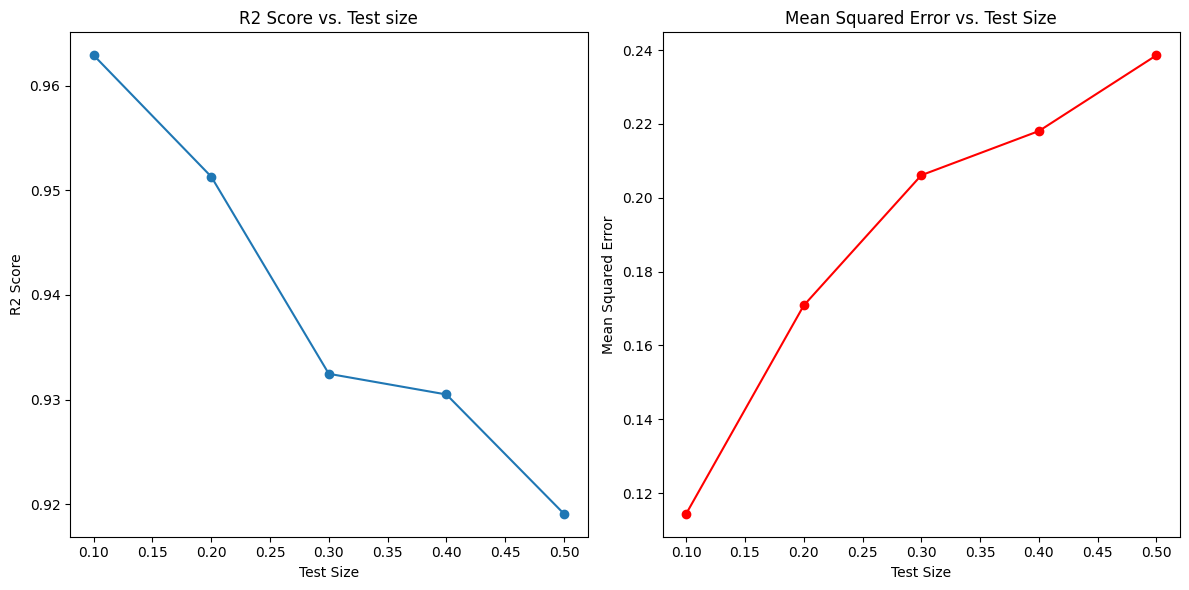

minimum mse value of 0.11442703603611729 was obtained for Test size0
maximum r2_score value of 0.9629264544039343 was obtained for Test size 0


In [180]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
r2_scores = []
mse_values = []
for size in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=size,random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2_scores.append(r2)
  mse_values.append(mse)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(test_sizes, r2_scores, marker='o')
plt.title('R2 Score vs. Test size')
plt.xlabel('Test Size')
plt.ylabel('R2 Score')
plt.subplot(1, 2, 2)
plt.plot(test_sizes, mse_values, marker='o', color='r')
plt.title('Mean Squared Error vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()
print(f"minimum mse value of {min(mse_values)} was obtained for Test size{mse_values.index(min(mse_values))}")
print(f"maximum r2_score value of {max(r2_scores)} was obtained for Test size {r2_scores.index(max(r2_scores))}")

In [181]:
# polynomial regression model

In [182]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

poly = PolynomialFeatures(degree=3)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

model = LinearRegression()
model.fit(x_poly_train,y_train)

y_pred = model.predict(x_poly_test)
print('r2 score :',r2_score(y_test,y_pred))
print('mse :',mean_squared_error(y_test,y_pred))

r2 score : 0.9479684174672336
mse : 0.1825726546800363


In [183]:
pred=model.predict(poly.transform([[20,20,30,12]]))
print("Predication :",pred[0])

Predication : 29.673294991885967


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


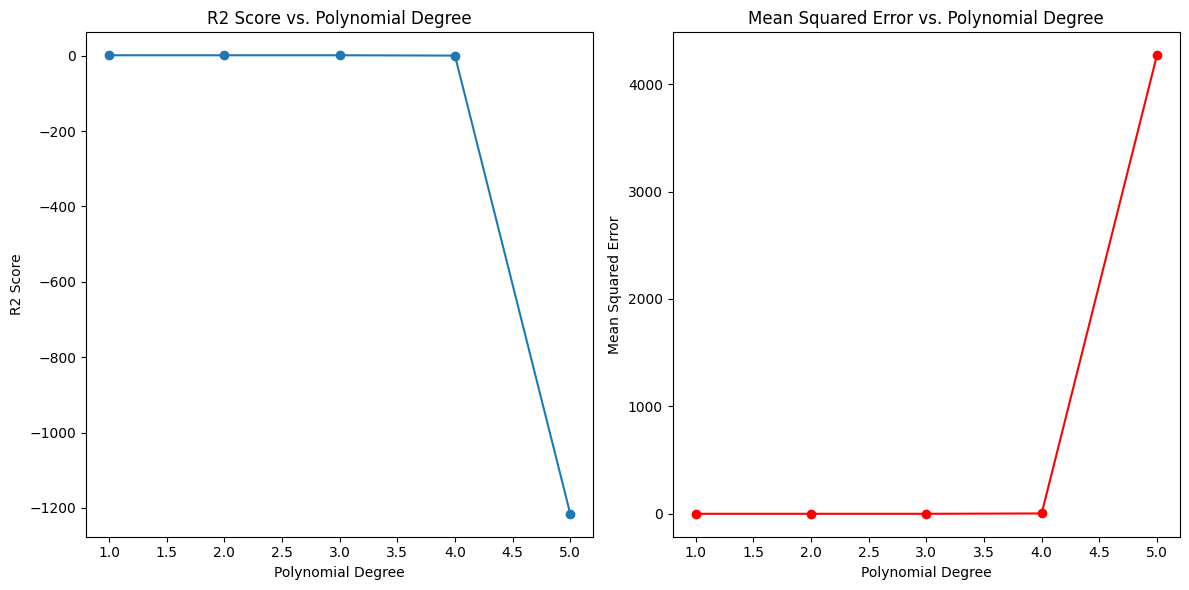

In [184]:
def polynomial_regression(degree):
  poly = PolynomialFeatures(degree=degree)
  X_poly_train = poly.fit_transform(x_train)
  X_poly_test = poly.transform(x_test)
  model = LinearRegression()
  model.fit(X_poly_train, y_train)
  y_pred = model.predict(X_poly_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  return r2, mse

degrees = range(1, 6)
r2_scores = []
mse_values = []
for degree in degrees:
  r2, mse = polynomial_regression(degree)
  r2_scores.append(r2)
  mse_values.append(mse)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(degrees, r2_scores, marker='o')
plt.title('R2 Score vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.subplot(1, 2, 2)
plt.plot(degrees, mse_values, marker='o', color='r')
plt.title('Mean Squared Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

In [185]:
# KNN Model

In [212]:
churn_data= pd.read_csv('Churn.csv')
churn_data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [213]:
churn_data.isna().sum()

,0
Unnamed: 0,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [214]:
churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].mean(),inplace=True)
churn_data

/tmp/ipython-input-815697601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].mean(),inplace=True)


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [215]:
churn_data.drop(['customerID', "Unnamed: 0"], axis=1,inplace=True)
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling', 'PaymentMethod']
churn_data = pd.get_dummies(churn_data,columns=categorical_features,drop_first=True)
churn_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,No,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,No,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,Yes,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,No,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,No,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,No,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,Yes,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [216]:
x = churn_data.drop(['Churn'], axis=1)
y = churn_data['Churn']
x.shape, y.shape

((7043, 30), (7043,))

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred))

Accuracy: 0.7771469127040455
Confusion Matrix:
 [[914 122]
 [192 181]]
Classification Report:               precision    recall  f1-score   support

          No       0.83      0.88      0.85      1036
         Yes       0.60      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [224]:
optimal_accuracy = 0
optimal_neighbor = 0
for k in range(20, 46):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  if accuracy > optimal_accuracy:
    optimal_accuracy = accuracy
    optimal_neighbor = k
print("Optimal Neighbor (k):", optimal_neighbor)
print("Optimal Accuracy Score:", optimal_accuracy)

Optimal Neighbor (k): 24
Optimal Accuracy Score: 0.801277501774308


In [ ]:
# Decision Tree Classifier

In [240]:
churn_data=pd.read_csv("Churn.csv")
churn_data.dtypes
churn_data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [241]:
churn_data.TotalCharges.fillna(churn_data.TotalCharges.mean(),inplace=True)

categorical_features = ['gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

churn_data = pd.get_dummies(churn_data, columns=categorical_features,drop_first=True)

churn_data

/tmp/ipython-input-1139820054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data.TotalCharges.fillna(churn_data.TotalCharges.mean(),inplace=True)


,Unnamed: 0,customerID,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,...,TotalCharges_8477.7,TotalCharges_8496.7,TotalCharges_8529.5,TotalCharges_8543.25,TotalCharges_8547.15,TotalCharges_8564.75,TotalCharges_8594.4,TotalCharges_8670.1,TotalCharges_8672.45,TotalCharges_8684.8
0,0,7590-VHVEG,No,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,5575-GNVDE,No,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,3668-QPYBK,Yes,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3,7795-CFOCW,No,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,9237-HQITU,Yes,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,No,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,7039,2234-XADUH,No,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,7040,4801-JZAZL,No,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,7041,8361-LTMKD,Yes,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [243]:
X = churn_data.drop(['customerID', 'Churn',"Unnamed: 0"], axis=1)
y = churn_data['Churn']
y.replace({"No":0,"Yes":1},inplace=True)

In [245]:
y.unique()

array([0, 1])

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix

dt_classifier =DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=2)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print("accuracy : ",accuracy_score(y_test, y_pred))
print("precision : ",precision_score(y_test, y_pred))
print("recall : ",recall_score(y_test, y_pred))
print("f1 score : ",f1_score(y_test, y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred))

accuracy :  0.7530163236337828
precision :  0.0
recall :  0.0
f1 score :  0.0
Confusion Matrix :
 [[1061    0]
 [ 348    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


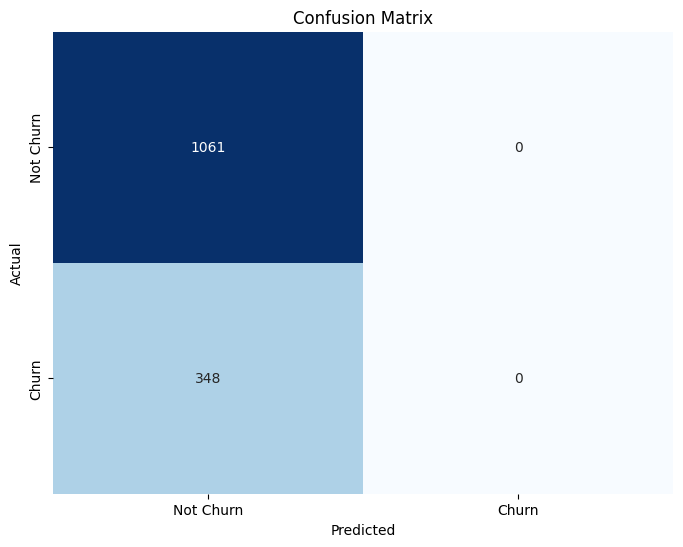

In [256]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn','Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [260]:
conf_matrix = confusion_matrix(y_test,y_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
print(TP,TN,FP,FN)
# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)

print(f'Accuracy: {accuracy}')
print(f'Recall (Sensitivity): {recall}')
print(f'Precision: {precision}')
print(f'Specificity: {specificity}')

0 1061 0 348
Accuracy: 0.7530163236337828
Recall (Sensitivity): 0.0
Precision: nan
Specificity: 1.0


/tmp/ipython-input-4085621495.py:10: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


In [262]:
from sklearn.metrics import classification_report
c=classification_report(y_test, y_pred)
print(c)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1061
           1       0.00      0.00      0.00       348

    accuracy                           0.75      1409
   macro avg       0.38      0.50      0.43      1409
weighted avg       0.57      0.75      0.65      1409



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [265]:
optimal_accuracy = 0
optimal_max_depth = 0
for max_depth in range(1, 11):
  dt_classifier = DecisionTreeClassifier(max_depth=max_depth,random_state=42,criterion="entropy")
  dt_classifier.fit(X_train, y_train)
  y_pred_val = dt_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_val)
  if accuracy > optimal_accuracy:
    optimal_accuracy = accuracy
    optimal_max_depth = max_depth
print("Optimal max_depth:", optimal_max_depth)
print("Optimal Accuracy Score:", optimal_accuracy)

Optimal max_depth: 6
Optimal Accuracy Score: 0.7984386089425124


In [267]:
dt_classifier.get_depth()

10

In [268]:
y_true = ["cat", "ant", "cat", "cat", "ant", "ant","cat"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat","ant"]
conf_matrix=confusion_matrix(y_true, y_pred, labels=["ant", "cat"])
conf_matrix

array([[2, 1],
       [2, 2]])

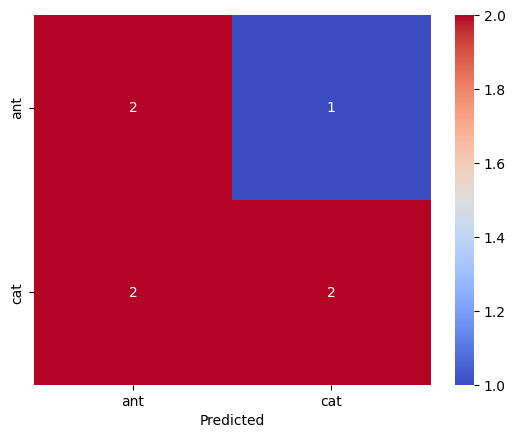

In [275]:
sns.heatmap(data = conf_matrix,cmap='coolwarm',annot=True,xticklabels=['ant','cat'],yticklabels=['ant','cat'])
plt.xlabel('Predicted')
plt.show()